## LBT (Learning Block Transformation) image compression

In [16]:
from IPython.display import Image, display

Downloaded http://www.hpca.ual.es/~vruiz/images/lena.png


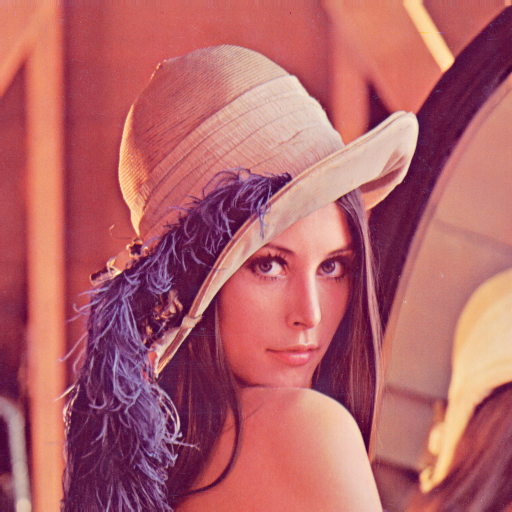

In [17]:
%run download_default_image.ipynb

In [18]:
!python ../src/LBT.py -h

usage: LBT.py [-h] [-g] {encode,decode} ...

Exploiting spatial redundancy with the 2D Discrete Cosine Transform of
constant block size.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Compress data
    decode         Uncompress data

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [45]:
!python ../src/LBT.py encode -h

usage: LBT.py encode [-h] [-B BLOCK_SIZE_DCT] [--side_info SIDE_INFO]
                     [--epochs EPOCHS] [--lr LR] [-t COLOR_TRANSFORM] [-p]
                     [-L LAMBDA] [-x]

options:
  -h, --help            show this help message and exit
  -B BLOCK_SIZE_DCT, --block_size_DCT BLOCK_SIZE_DCT
                        Block size (default: 8)
  --side_info SIDE_INFO
                        Ruta para guardar los pesos entrenados (opcional)
  --epochs EPOCHS       Number of training epochs
  --lr LR               Learning rate
  -t COLOR_TRANSFORM, --color_transform COLOR_TRANSFORM
                        Color transform (default: "YCoCg")
  -p, --perceptual_quantization
                        Use perceptual quantization (default: "False")
  -L LAMBDA, --Lambda LAMBDA
                        Relative weight between the rate and the distortion.
                        If provided (float), the block size is RD-optimized
                        between {2**i; i=1,2,3,4,5,6,7}. For exa

In [61]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 1 --block_size 4 --epochs 1 --lr 2
rm /tmp/decoded.png
python ../src/LBT.py decode -q 1 --block_size 4
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=4, side_info=None, epochs=1, lr=2.0, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=1, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x72e523e47c40>)


(INFO) entropy_image_coding: Written 660702 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=4, side_info=None, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=False, quantizer='deadzone', QSS=1, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x795da713bce0>)
128 128
Code-stream file: /tmp/encoded.tif length: 660702
Code-stream file: /tmp/encoded.weights.pth length: 4133
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded.weights.pth', '/tmp/encoded_shape.bin'] 664847 bytes (20.29) bits/pixel
Decoded image: /tmp/decoded.png 479844 bytes (14.64) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 1.18
J = R + D = 21.47


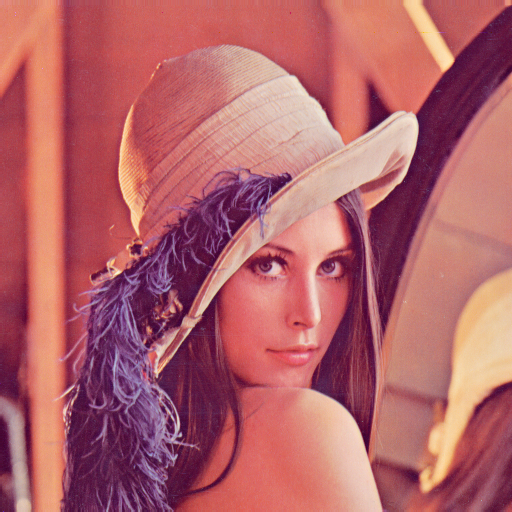

In [62]:
display(Image(filename="/tmp/decoded.png"))

In [63]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 1 --block_size 4 --epochs 1 --lr 2 --L 1
rm /tmp/decoded.png
python ../src/LBT.py decode -q 1 --block_size 4
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=4, side_info=None, epochs=1, lr=2.0, color_transform='YCoCg', perceptual_quantization=False, Lambda=1, disable_subbands=False, quantizer='deadzone', QSS=1, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7adc1a047c40>)


(INFO) entropy_image_coding: Written 88619 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=4, side_info=None, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=False, quantizer='deadzone', QSS=1, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f8b3d93bce0>)
128 128
Code-stream file: /tmp/encoded.tif length: 88619
Code-stream file: /tmp/encoded.weights.pth length: 4133
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded.weights.pth', '/tmp/encoded_shape.bin'] 92764 bytes (2.83) bits/pixel
Decoded image: /tmp/decoded.png 62250 bytes (1.90) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 163.23
J = R + D = 166.06


In [ ]:
display(Image(filename="/tmp/decoded.png"))

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 1 --block_size 4
rm /tmp/decoded.png
python ../src/LBT.py decode -q 1 --block_size 4
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=32, side_info=None, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=1, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7b9cf693fba0>)


(INFO) entropy_image_coding: Written 645636 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=32, side_info=None, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=False, quantizer='deadzone', QSS=1, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x74e9a1847c40>)
16 16
Code-stream file: /tmp/encoded.tif length: 645636
Code-stream file: /tmp/encoded.weights.pth length: 8390693
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded.weights.pth', '/tmp/encoded_shape.bin'] 9036341 bytes (275.77) bits/pixel
Decoded image: /tmp/decoded.png 481060 bytes (14.68) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 1.43
J = R + D = 277.20


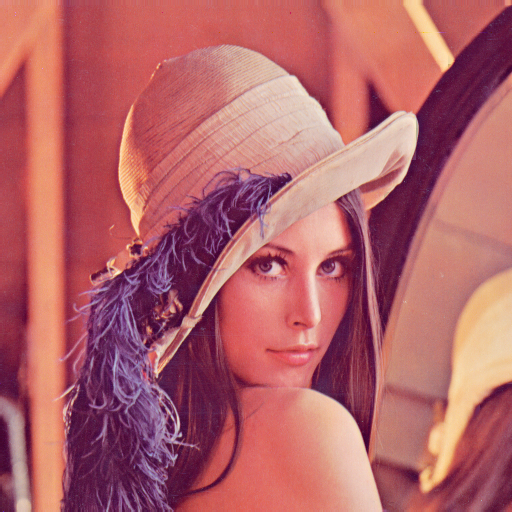

In [21]:
display(Image(filename="/tmp/decoded.png"))

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 1 --block_size 16
rm /tmp/decoded.png
python ../src/LBT.py decode -q 1 --block_size 16
python ../src/RDE.py

In [ ]:
display(Image(filename="/tmp/decoded.png"))

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 4 --block_size 16
rm /tmp/decoded.png
python ../src/LBT.py decode -q 4 --block_size 16
python ../src/RDE.py

In [ ]:
display(Image(filename="/tmp/decoded.png"))

### Enable perceptual quantization

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -p -q 4 -B 16
rm /tmp/decoded.png
python ../src/LBT.py decode -p -q 4 -B 16
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=32, side_info=None, color_transform='YCoCg', perceptual_quantization=True, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=4, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7558b9f3fba0>)


(INFO) entropy_image_coding: Written 336020 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=32, side_info=None, color_transform='YCoCg', perceptual_quantization=True, disable_subbands=False, quantizer='deadzone', QSS=4, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x72f0e1447c40>)
16 16
Code-stream file: /tmp/encoded.tif length: 336020
Code-stream file: /tmp/encoded.weights.pth length: 8390693
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded.weights.pth', '/tmp/encoded_shape.bin'] 8726725 bytes (266.32) bits/pixel
Decoded image: /tmp/decoded.png 472871 bytes (14.43) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 10.96
J = R + D = 277.28


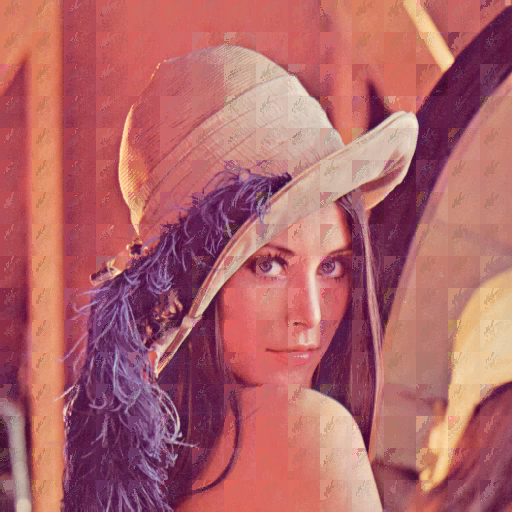

In [25]:
display(Image(filename="/tmp/decoded.png"))

###  The same, but compressing more

In [26]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -p -q 8 -B 32
rm /tmp/decoded.png
python ../src/LBT.py decode -p -q 8 -B 32
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=32, side_info=None, color_transform='YCoCg', perceptual_quantization=True, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=8, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7aa2a003fba0>)


(INFO) entropy_image_coding: Written 208521 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=32, side_info=None, color_transform='YCoCg', perceptual_quantization=True, disable_subbands=False, quantizer='deadzone', QSS=8, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7b44d253bc40>)
16 16
Code-stream file: /tmp/encoded.tif length: 208521
Code-stream file: /tmp/encoded.weights.pth length: 8390693
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded.weights.pth', '/tmp/encoded_shape.bin'] 8599226 bytes (262.43) bits/pixel
Decoded image: /tmp/decoded.png 430522 bytes (13.14) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 18.88
J = R + D = 281.31


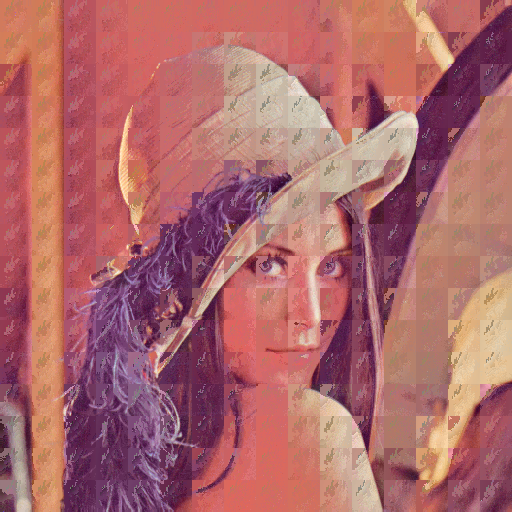

In [27]:
display(Image(filename="/tmp/decoded.png"))

## Using LloydMax

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 16 -a LloydMax -m -2048 -n 2047 
rm /tmp/decoded.png
python ../src/LBT.py decode -q 16 -a LloydMax -m -2048 -n 2047 
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=8, side_info=None, epochs=100, lr=0.001, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=False, quantizer='LloydMax', QSS=32, min_val=-2048, max_val=2047, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7b4be963fc40>)


(INFO) LloydMax: min_val = -2048
(INFO) LloydMax: max_val = 2047
(INFO) LloydMax: QSS = 32
(INFO) LloydMax: QSS = 32
(INFO) LloydMax: histogram = [0 0 0 ... 0 0 0]
(INFO) LloydMax: Written 419 bytes in /tmp/encoded_centroids_0.gz
(INFO) LloydMax: histogram = [0 0 0 ... 0 0 0]
(INFO) LloydMax: Written 403 bytes in /tmp/encoded_centroids_1.gz
(INFO) LloydMax: histogram = [0 0 0 ... 0 0 0]
(INFO) LloydMax: Written 393 bytes in /tmp/encoded_centroids_2.gz
(INFO) entropy_image_coding: Written 121257 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=8, side_info=None, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=False, quantizer='LloydMax', QSS=32, filter='no_filter', min_val=-2048, max_val=2047, entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x720f77443ce0>)


(INFO) LloydMax: min_val = -2048
(INFO) LloydMax: max_val = 2047
(INFO) LloydMax: QSS = 32
(INFO) LloydMax: QSS = 32
(INFO) LloydMax: min_val=-2048
(INFO) LloydMax: max_val=2047
(INFO) LloydMax: Read /tmp/encoded_centroids_0.gz
(INFO) LloydMax: Read /tmp/encoded_centroids_1.gz
(INFO) LloydMax: Read /tmp/encoded_centroids_2.gz


64 64
Code-stream file: /tmp/encoded.tif length: 121257
Code-stream file: /tmp/encoded_centroids_2.gz length: 393
Code-stream file: /tmp/encoded_centroids_1.gz length: 403
Code-stream file: /tmp/encoded_centroids_0.gz length: 419
Code-stream file: /tmp/encoded_params.txt length: 14
Code-stream file: /tmp/encoded.weights.pth length: 34853
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_centroids_2.gz', '/tmp/encoded_centroids_1.gz', '/tmp/encoded_centroids_0.gz', '/tmp/encoded_params.txt', '/tmp/encoded.weights.pth', '/tmp/encoded_shape.bin'] 157351 bytes (4.80) bits/pixel
Decoded image: /tmp/decoded.png 121769 bytes (3.72) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 11.17
J = R + D = 15.97


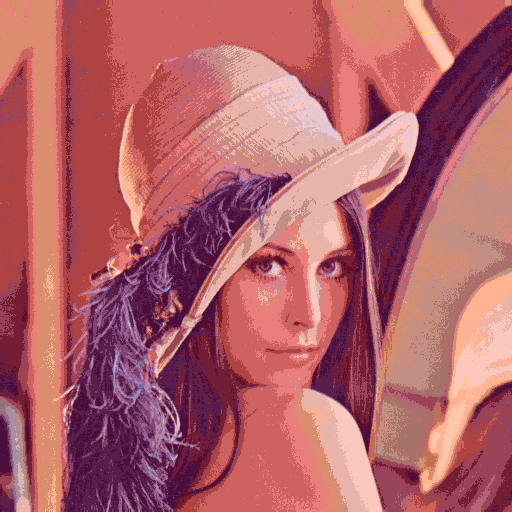

In [55]:
display(Image(filename="/tmp/decoded.png"))

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 1 -a LloydMax -m -2048 -n 2047 
rm /tmp/decoded.png
python ../src/LBT.py decode -q 1 -a LloydMax -m -2048 -n 2047 
python ../src/RDE.py

In [ ]:
display(Image(filename="/tmp/decoded.png"))